<a href="https://colab.research.google.com/github/AndrzejOlejniczak/PORTFOLIO/blob/main/CNN_do_food101_data_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-07-13 17:46:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  71.9MB/s    in 7.6s    

2022-07-13 17:46:47 (65.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Walk through ten classes of foof image data
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'{dirpath}, {len(dirnames)}, {len(filenames)}')

10_food_classes_all_data, 2, 0
10_food_classes_all_data/test, 10, 0
10_food_classes_all_data/test/sushi, 0, 250
10_food_classes_all_data/test/pizza, 0, 250
10_food_classes_all_data/test/hamburger, 0, 250
10_food_classes_all_data/test/ice_cream, 0, 250
10_food_classes_all_data/test/ramen, 0, 250
10_food_classes_all_data/test/grilled_salmon, 0, 250
10_food_classes_all_data/test/chicken_wings, 0, 250
10_food_classes_all_data/test/steak, 0, 250
10_food_classes_all_data/test/fried_rice, 0, 250
10_food_classes_all_data/test/chicken_curry, 0, 250
10_food_classes_all_data/train, 10, 0
10_food_classes_all_data/train/sushi, 0, 750
10_food_classes_all_data/train/pizza, 0, 750
10_food_classes_all_data/train/hamburger, 0, 750
10_food_classes_all_data/train/ice_cream, 0, 750
10_food_classes_all_data/train/ramen, 0, 750
10_food_classes_all_data/train/grilled_salmon, 0, 750
10_food_classes_all_data/train/chicken_wings, 0, 750
10_food_classes_all_data/train/steak, 0, 750
10_food_classes_all_data/train/

In [ ]:
# Setup train and test dorectories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
# import ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create augmented and not augmented train datasets

# Create data generators
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=.2,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   height_shift_range=.3,
                                   horizontal_flip=True
                                  )

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

# Create batch flow from directories
train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              batch_size=32)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode='categorical',
                                            batch_size=32)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Import modules
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import seaborn as sns
import pandas as pd

# Import Keras layer classes

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, SpatialDropout2D, Flatten, Dense, Activation, AveragePooling2D

In [ ]:
def plot_curves_with_regression(history, order=2):

    '''
    Uses seaborn and to plot curves
    as scatterplot with regression
    attrs:
    history: history object
    order: order of regression curve
    default order=2
    '''

    # Create DataFrame
    df = pd.DataFrame(history.history)

    # Setup the figure
    plt.figure(figsize=(32, 8))
    plt.suptitle(f'Model {history.model.name} metrics', fontsize='x-large')

    # Plot loss
    plt.subplot(1, 2, 1)
    sns.regplot(x='index', y='loss', data=df.reset_index(),
                order=order, label='Training Loss')
    sns.regplot(x='index', y='val_loss', data=df.reset_index(),
                order=order, label='Validation Loss')
    plt.legend()
    plt.title('Loss Curves')

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    sns.regplot(x='index', y='accuracy', data=df.reset_index(),
                order=order, label='Training Accuracy')
    sns.regplot(x='index', y='val_accuracy', data=df.reset_index(),
                order=order, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Curves')

In [ ]:
# Set the learning rate
lr = 0.0005

In [ ]:
# Check if GPU is available
len(tf.config.list_physical_devices('GPU'))

1

In [ ]:
# Create a model
model_22 = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)),
    SpatialDropout2D(0.2),
    Conv2D(64,3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    SpatialDropout2D(0.2),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_22.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
model_22.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 spatial_dropout2d (SpatialD  (None, 222, 222, 64)     0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      3

In [ ]:
history_22 = model_22.fit(train_data_aug,
                          epochs=100,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/100
235/235 [==============================] - 116s 447ms/step - loss: 2.2709 - accuracy: 0.1256 - val_loss: 2.1644 - val_accuracy: 0.1876
Epoch 2/100
235/235 [==============================] - 105s 448ms/step - loss: 2.2147 - accuracy: 0.1731 - val_loss: 2.1360 - val_accuracy: 0.2080
Epoch 3/100
235/235 [==============================] - 104s 444ms/step - loss: 2.1737 - accuracy: 0.1989 - val_loss: 2.0538 - val_accuracy: 0.2600
Epoch 4/100
235/235 [==============================] - 104s 441ms/step - loss: 2.1306 - accuracy: 0.2287 - val_loss: 2.0217 - val_accuracy: 0.2856
Epoch 5/100
235/235 [==============================] - 104s 441ms/step - loss: 2.0889 - accuracy: 0.2453 - val_loss: 1.9608 - val_accuracy: 0.3120
Epoch 6/100
235/235 [==============================] - 104s 443ms/step - loss: 2.0475 - accuracy: 0.2683 - val_loss: 1.8931 - val_accuracy: 0.3384
Epoch 7/100
235/235 [==============================] - 104s 441ms/step - loss: 2.0050 - accuracy: 0.2947 - val_loss: 1

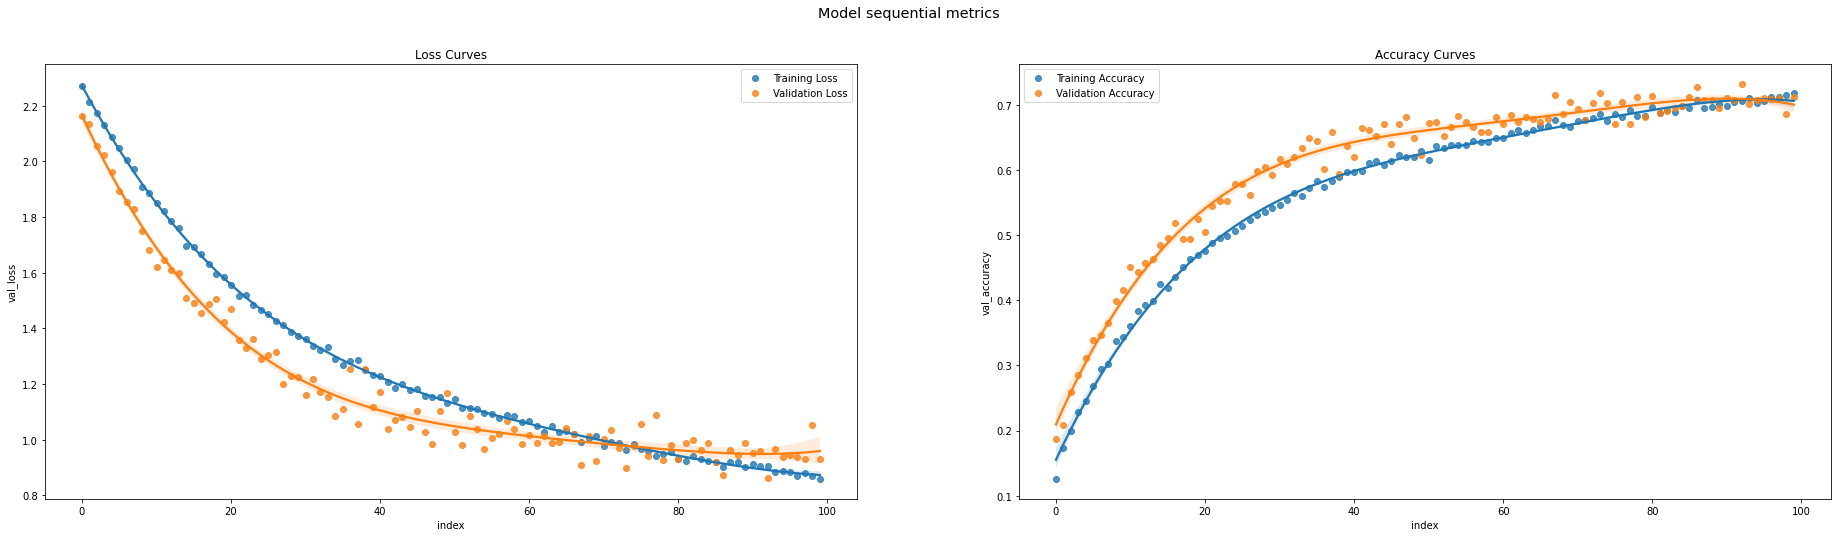

In [ ]:
plot_curves_with_regression(history_22, order=4)

In [ ]:
# Create a model
model_23 = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)),
    SpatialDropout2D(0.2),
    Conv2D(64,3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu'),
    SpatialDropout2D(0.2),
    Conv2D(128, 3, activation='relu'),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_23.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
               metrics=['accuracy'])

In [ ]:
model_23.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 spatial_dropout2d (SpatialD  (None, 222, 222, 64)     0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      3

In [ ]:
history_23 = model_23.fit(train_data_aug,
                          epochs=100,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/100
235/235 [==============================] - 128s 496ms/step - loss: 2.2508 - accuracy: 0.1399 - val_loss: 2.1610 - val_accuracy: 0.1860
Epoch 2/100
235/235 [==============================] - 116s 492ms/step - loss: 2.1882 - accuracy: 0.1856 - val_loss: 2.1210 - val_accuracy: 0.2140
Epoch 3/100
235/235 [==============================] - 116s 491ms/step - loss: 2.1412 - accuracy: 0.2247 - val_loss: 2.0087 - val_accuracy: 0.3108
Epoch 4/100
235/235 [==============================] - 116s 493ms/step - loss: 2.0721 - accuracy: 0.2680 - val_loss: 1.9326 - val_accuracy: 0.3284
Epoch 5/100
235/235 [==============================] - 115s 490ms/step - loss: 2.0253 - accuracy: 0.2871 - val_loss: 1.9615 - val_accuracy: 0.3196
Epoch 6/100
235/235 [==============================] - 115s 489ms/step - loss: 1.9908 - accuracy: 0.3005 - val_loss: 1.8347 - val_accuracy: 0.3696
Epoch 7/100
235/235 [==============================] - 114s 486ms/step - loss: 1.9498 - accuracy: 0.3201 - val_loss: 1

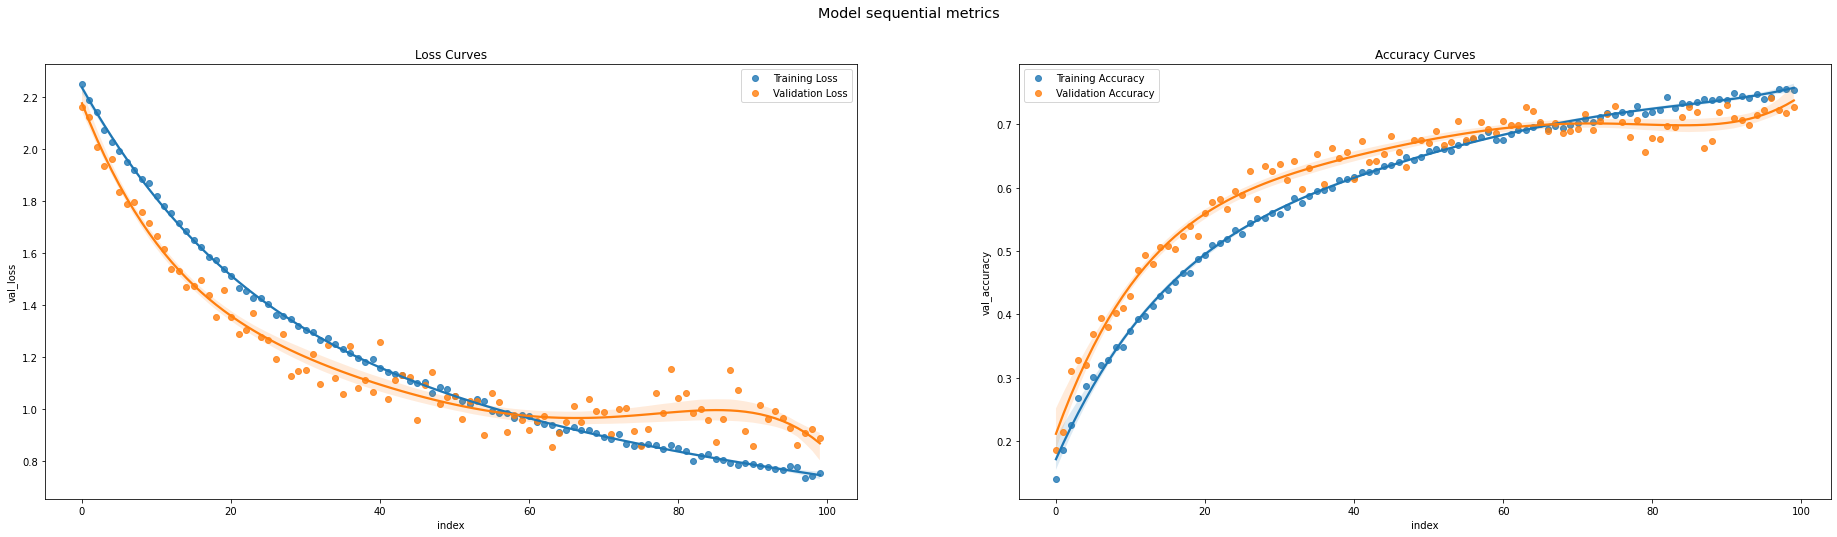

In [ ]:
 plot_curves_with_regression(history_23, order=5)

In [ ]:
model_23.save('model_23_72percent')

INFO:tensorflow:Assets written to: model_23_72percent/assets
